In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [8]:
country_code=pd.read_excel("Country-Code.xlsx")
country_code.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [9]:
final_df=pd.merge(df,country_code,on="Country Code",how="left")
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
final_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
final_df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
df['Cuisines'].dropna(axis = 0, inplace = True)

In [17]:
final_df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

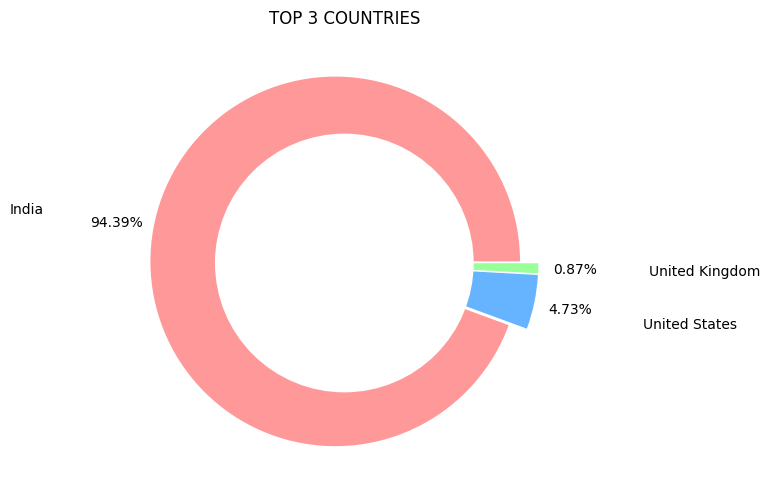

In [24]:
country_name = final_df["Country"].value_counts().index[:3]
country_transaction = final_df["Country"].value_counts().values[:3]
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
plt.figure(figsize = (8,6))
plt.pie(country_transaction, labels = country_name,
        autopct = "%1.2f%%", explode = (0.05, 0.05, 0.05),
        pctdistance = 1.2,labeldistance = 1.6,
        colors = ['#ff9999','#66b3ff','#99ff99'])
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("TOP 3 COUNTRIES")
plt.show()

The chart indicates a significant trend: Indians are consistently opting to order meals from Zomato as part of their daily routine.

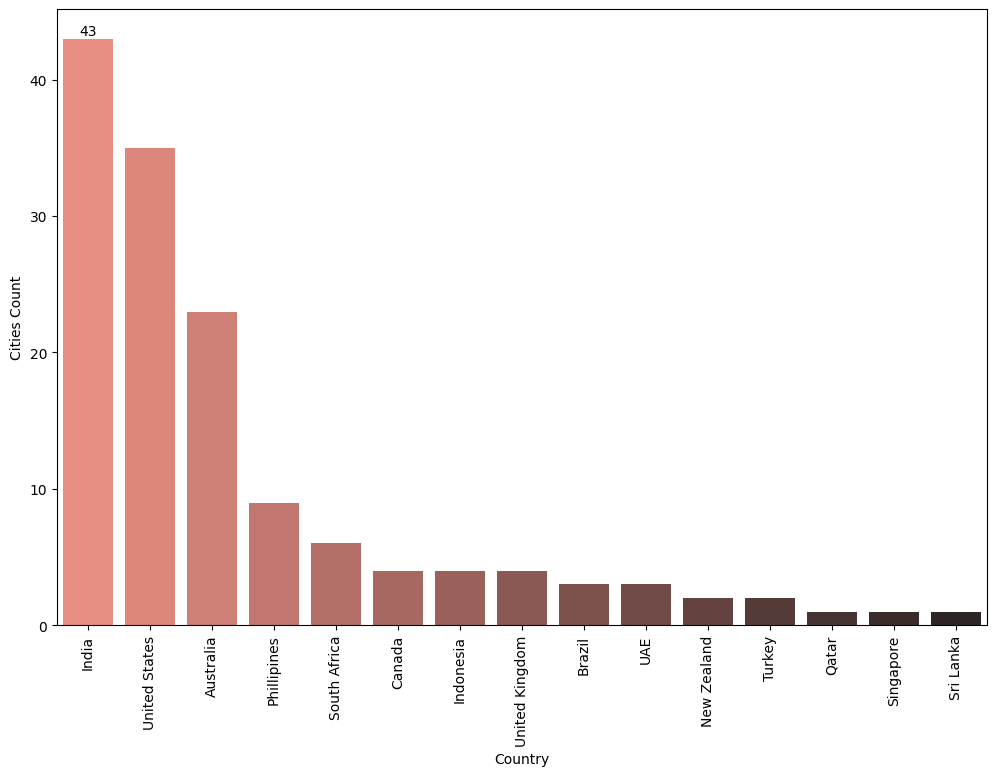

In [19]:
city_counts = list()
for i in final_df.groupby(['Country','City']).count().index:
    city_counts.append(i[0])
city_counts = dict(Counter(city_counts))
city_counts = dict(sorted(city_counts.items(),key = lambda x:x[1],reverse = True))
country = list(city_counts.keys())
counts = list(city_counts.values())
fig = plt.figure(figsize = (12,8))
plt.xlabel('Country')
plt.ylabel('Cities Count')
plt.xticks(rotation=90)
ax = sns.barplot(x = country, y = counts, palette = "dark:salmon_r")
ax.bar_label(ax.containers[0])
plt.show()

The bar graphs above highlight that India has a greater number of cities placing food orders compared to other countries.

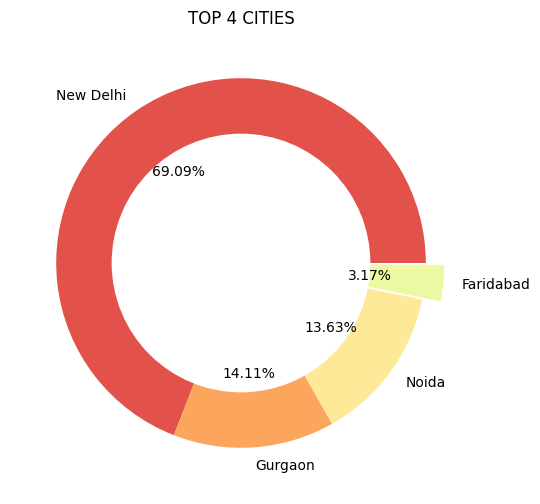

In [25]:
cities = final_df["City"].value_counts().index[:4]
orders = final_df["City"].value_counts().values[:4]
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
plt.figure(figsize = (8,6))
plt.pie(orders, labels = cities,
        autopct = "%1.2f%%",
        explode = [0,0,0,0.1],
        colors = sns.color_palette("Spectral"))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("TOP 4 CITIES")
plt.show()

New Delhi, a city in India, stands out as the top location for Zomato orders, boasting the highest number of transactions.

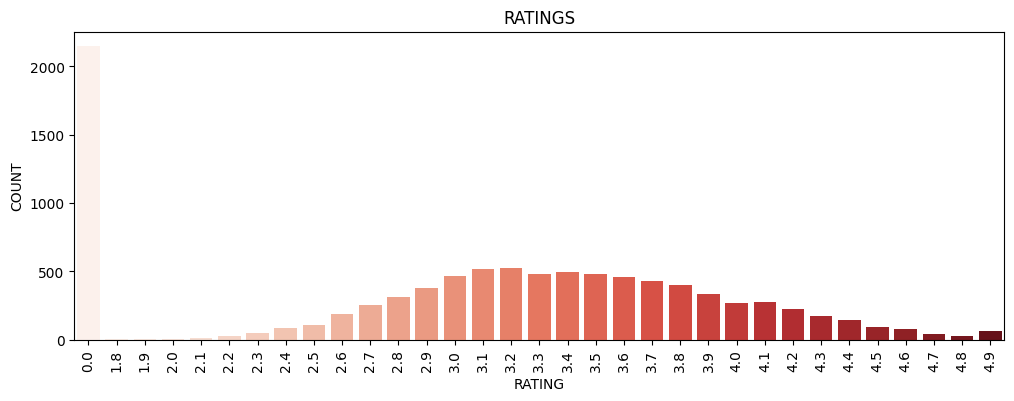

In [31]:
rating = final_df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns = {0: "Rating Count"})
plt.figure(figsize = (12, 4))
sns.barplot(x = "Aggregate rating", y = "Rating Count", data = rating, palette = "Reds")
plt.xticks(rotation = 90)
plt.title("RATINGS")
plt.xlabel("RATING")
plt.ylabel("COUNT")
plt.show()

Based on the chart provided, customers typically give ratings ranging from 2.8 to 4.1 on average.

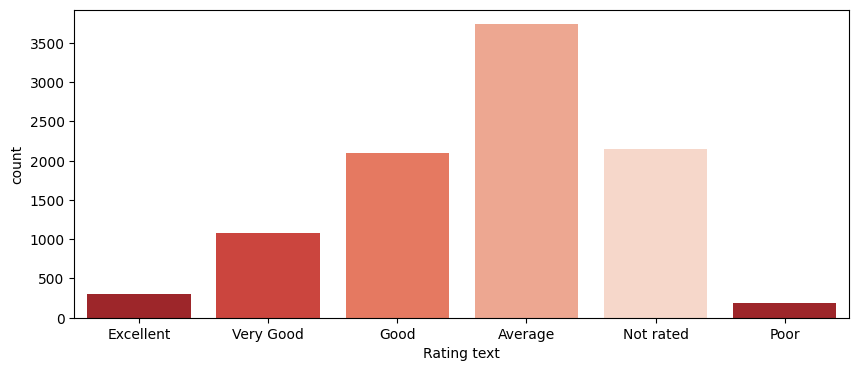

In [34]:
plt.figure(figsize = (10, 4))
sns.countplot(x = "Rating text", data = final_df, palette = sns.color_palette("Reds_r", 5))
plt.show()

Overall, most customers think Zomato is a great food delivery application.

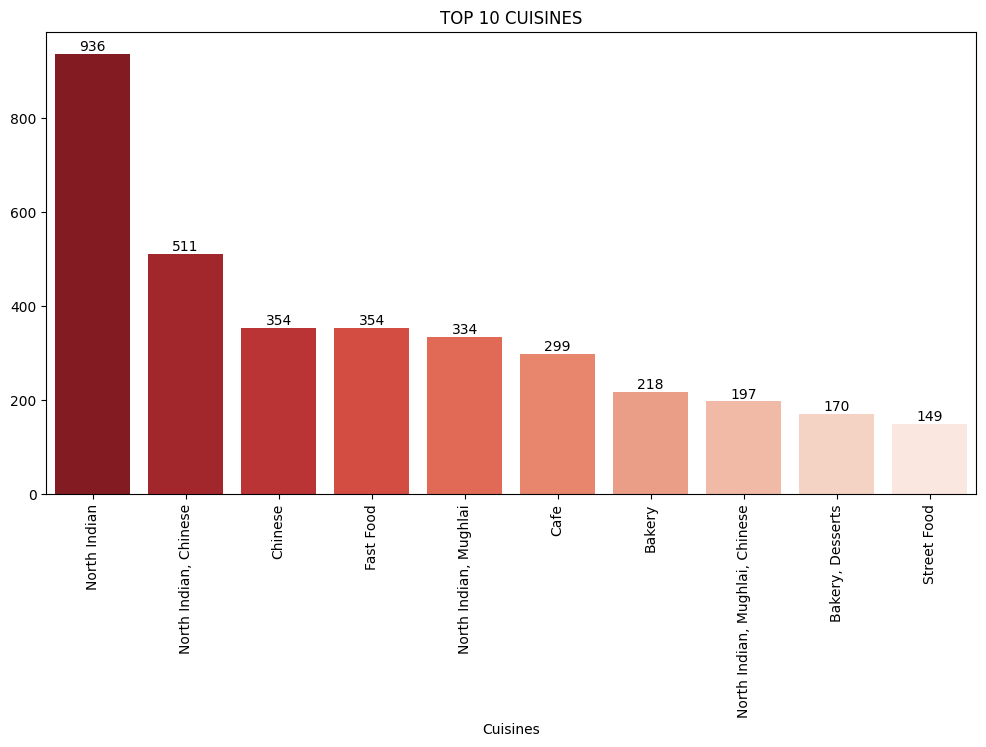

In [43]:
countries = final_df["Cuisines"].value_counts().index[:10]
ordersc = final_df["Cuisines"].value_counts().values[:10]
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
barplot = sns.barplot(x = countries, y = ordersc, palette = sns.color_palette("Reds_r", 10))
plt.title("TOP 10 CUISINES")

for index, value in enumerate(ordersc):
    barplot.text(index, value + 0.1, str(value), ha ='center', va ='bottom')
    
plt.show()

North Indian cuisine enjoys greater popularity and recognition.

In [44]:
onlinedelivery=final_df.groupby(["Country","Has Online delivery"]).size().reset_index()
onlinedelivery

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [45]:
currency=final_df.groupby(["Country","Currency"]).size().reset_index()
currency

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


<Figure size 1200x800 with 0 Axes>

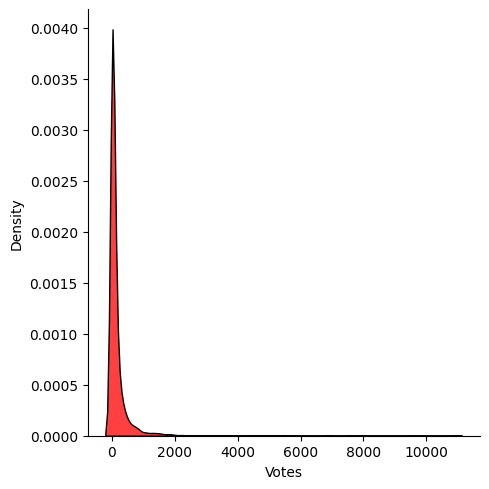

In [50]:
plt.figure(figsize = (12,8))
sns.displot(final_df, x = "Votes", kind = "kde", multiple = "stack", color = 'red')
plt.show()

The graph that shows how the number of votes is spread out across the dataset. 

# Distribution of votes for each country:

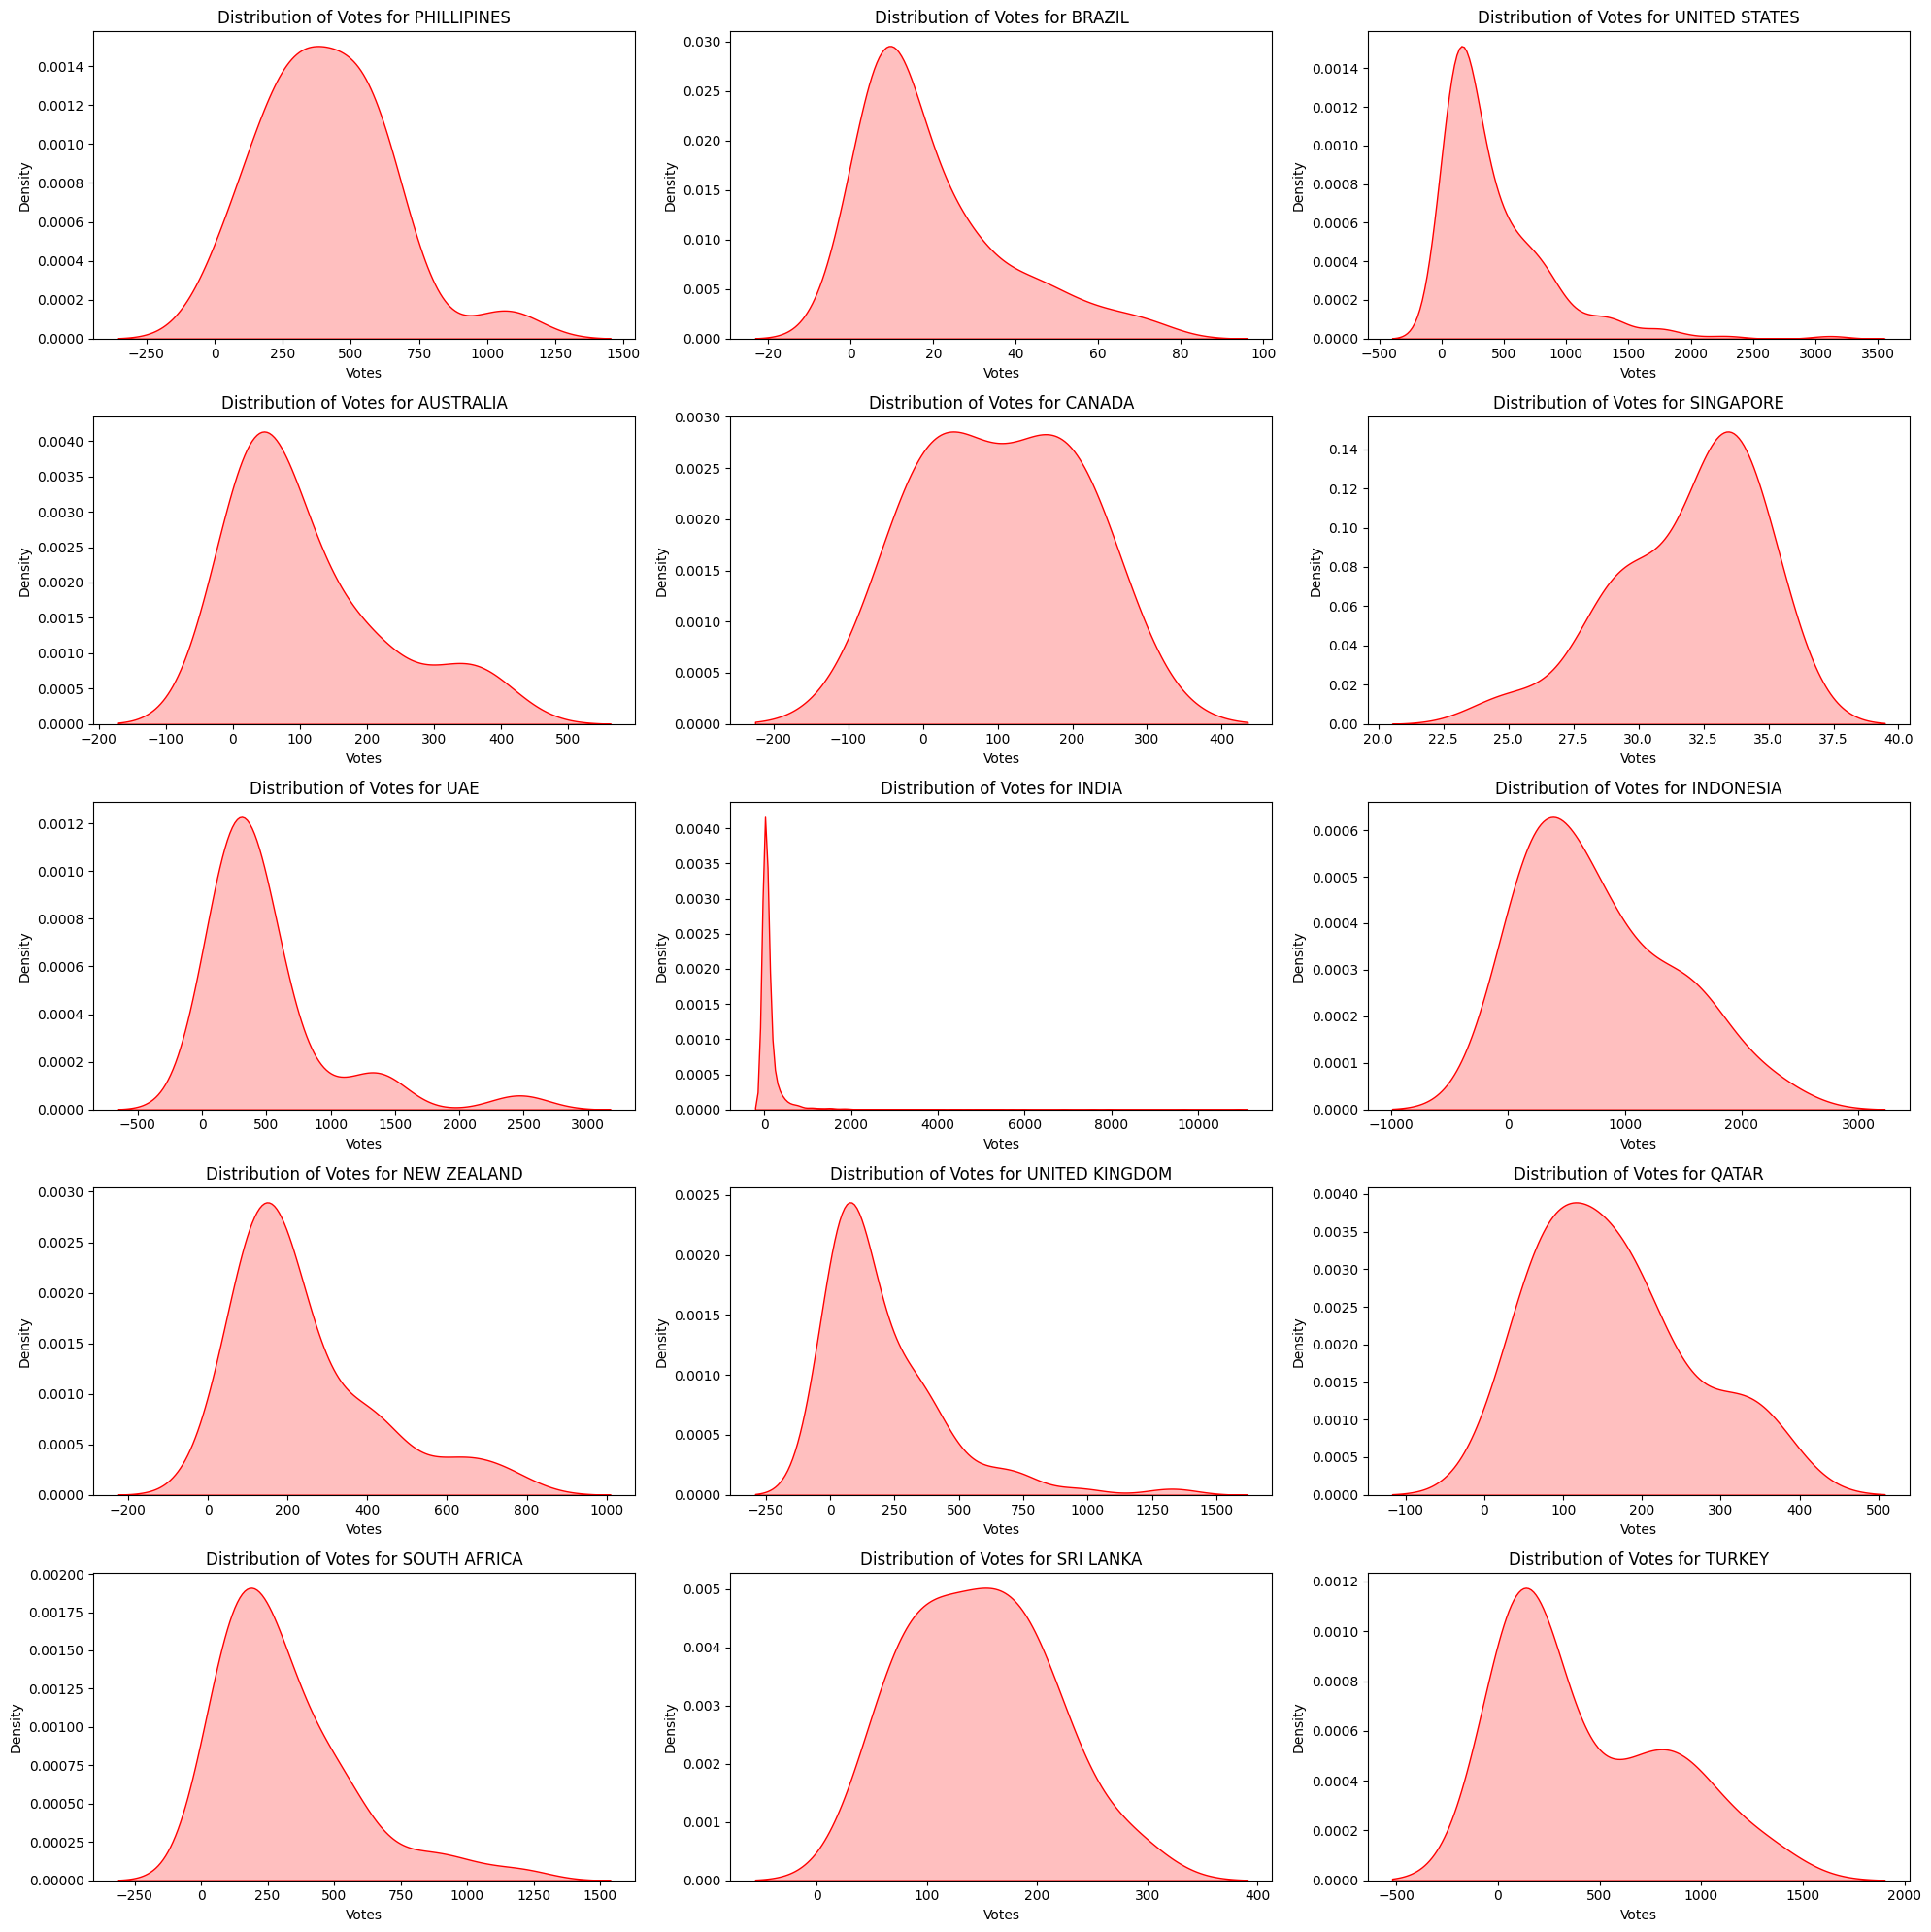

In [52]:
countries = final_df["Country"].unique()

fig, axes = plt.subplots(5, 3, figsize=(20, 20))

axes = axes.flatten()

for i, country in enumerate(countries):
    df_country = final_df[final_df["Country"] == country]
    sns.kdeplot(data = df_country["Votes"], fill = True, color = "red", ax = axes[i])
    axes[i].set_title("Distribution of Votes for {}".format(country.upper()))
    axes[i].set_xlabel("Votes")
    axes[i].set_ylabel("Density")


plt.tight_layout()
plt.show()

# Distribution of price range:

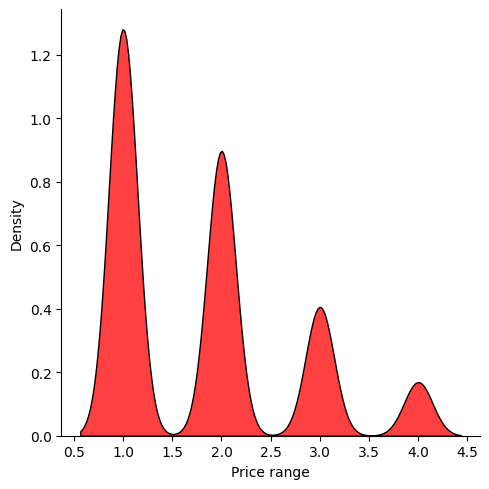

In [54]:
sns.displot(final_df, x = "Price range", kind = "kde", multiple = "stack", color = 'red')
plt.show()

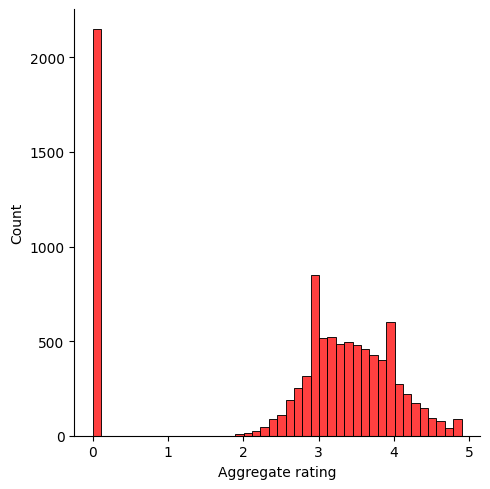

In [55]:
sns.displot(final_df, x = "Aggregate rating", kind = "hist", multiple = "stack", color = 'red')
plt.show()

<Figure size 1200x800 with 0 Axes>

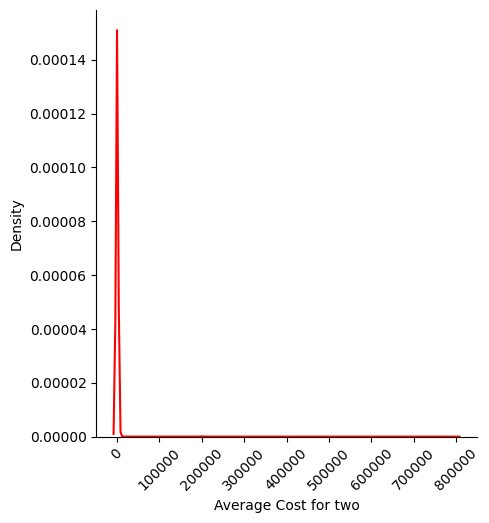

In [59]:
plt.figure(figsize = (12, 8))
sns.displot(final_df, x = "Average Cost for two", kind = "kde", color = 'red')
plt.xticks(rotation = 45)
plt.show()

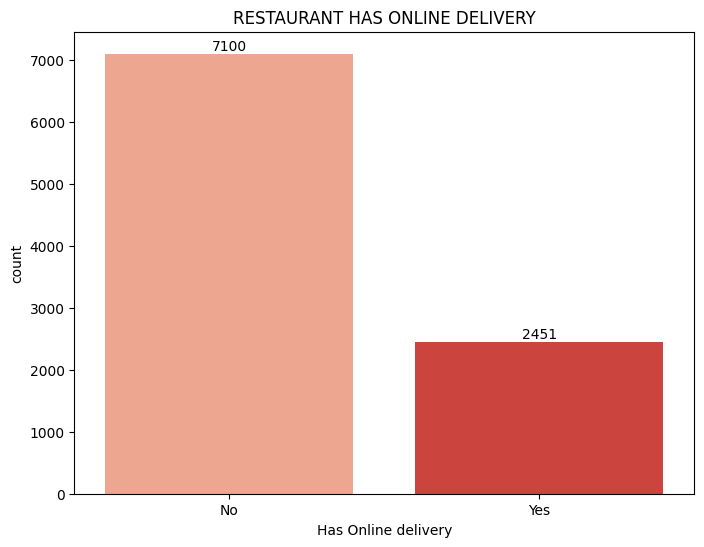

In [67]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "Has Online delivery", data = final_df, palette = "Reds")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title("RESTAURANT HAS ONLINE DELIVERY")
plt.show()

The data suggests that the majority of restaurants do not offer online delivery services.

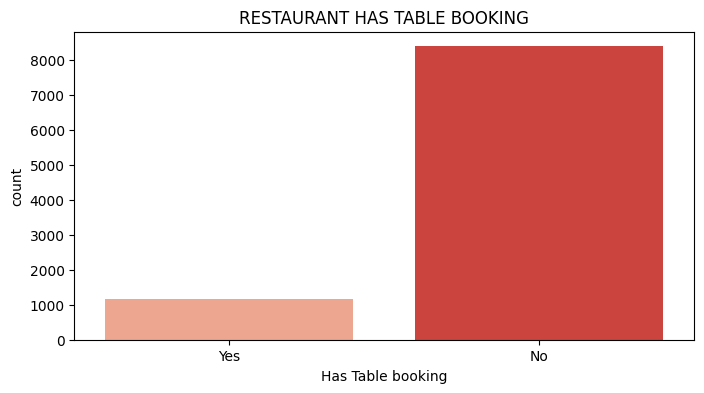

In [70]:
plt.figure(figsize = (8, 4))
sns.countplot(x = "Has Table booking", data = final_df, palette = "Reds")
plt.title("RESTAURANT HAS TABLE BOOKING")
plt.show()

The data suggests that the majority of restaurants do not offer the option for advance table booking.

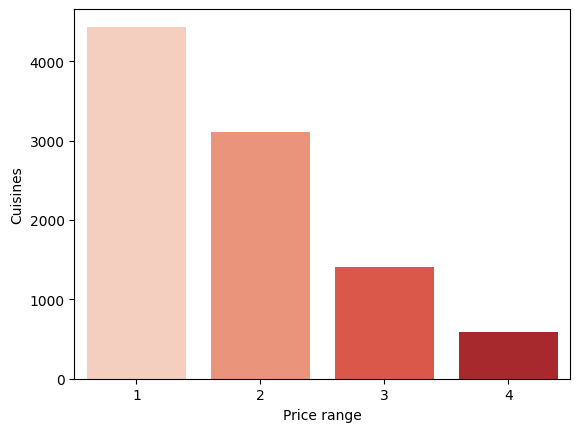

In [73]:
cuisines = final_df.groupby("Price range")["Cuisines"].count().reset_index()
sns.barplot(data = cuisines, x = "Price range", y = "Cuisines", palette = "Reds")
plt.show()

The data indicates that the highest count of cuisines is associated with the price range of 1.

In [76]:
vote = final_df.groupby("Restaurant Name")["Votes"].sum().reset_index()
vote = vote.sort_values(by = "Votes")
vote = vote.tail(10)

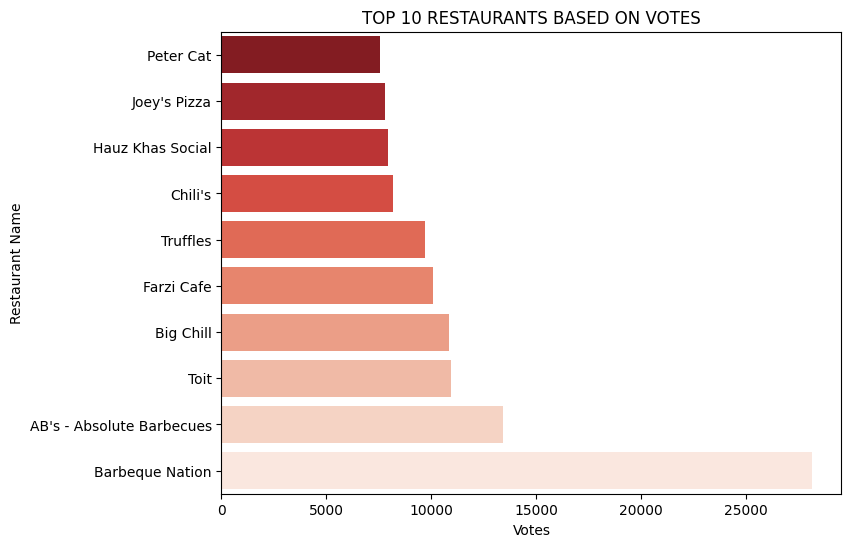

In [79]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Votes", y = "Restaurant Name", data = vote, palette = "Reds_r")
plt.title("TOP 10 RESTAURANTS BASED ON VOTES")
plt.show()

Barbeque Nation is the top choice among people, receiving the highest number of votes.

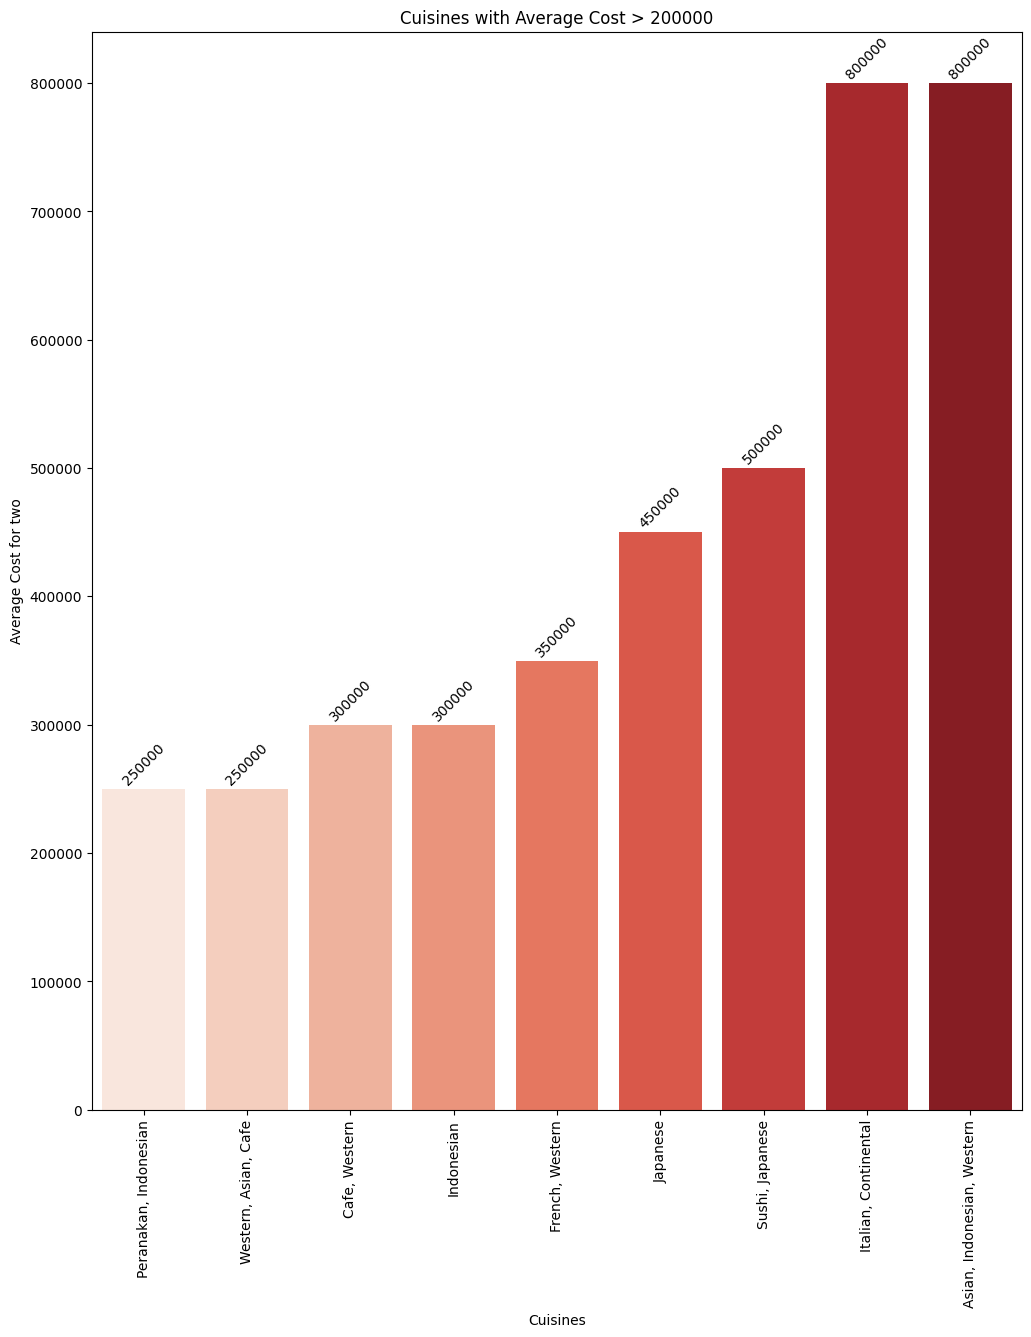

In [87]:
acft = final_df[final_df['Average Cost for two'] > 200000]
acft = acft.sort_values(by='Average Cost for two')
plt.figure(figsize = (12,14))
barplot = sns.barplot(data = acft, x = "Cuisines", y = "Average Cost for two", palette = "Reds")
plt.xticks(rotation = 90)
plt.title("Cuisines with Average Cost > 200000")
plt.xlabel("Cuisines")
plt.ylabel("Average Cost for two")

for index, value in enumerate(acft['Average Cost for two']):
    barplot.text(index, value + 1000, str(value), ha = 'center', va = 'bottom', rotation = 45, color = 'black')
plt.show()

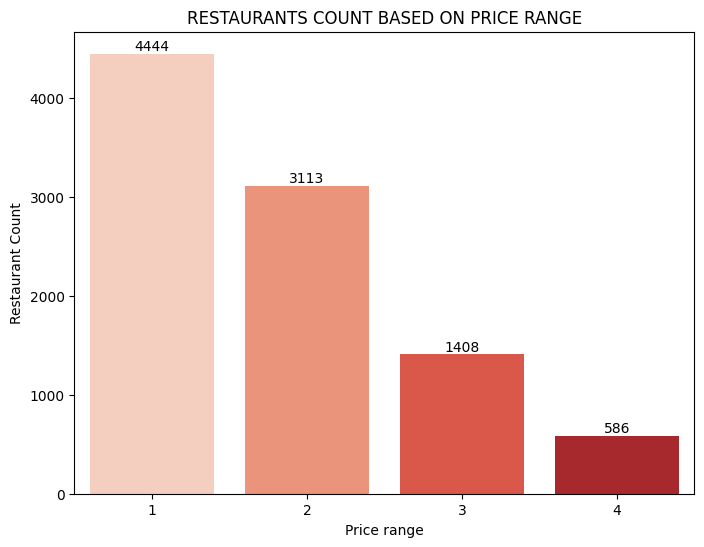

In [93]:
restaurant_counts = final_df.groupby('Price range')['Restaurant Name'].count().reset_index()
plt.figure(figsize = (8,6))
barplot = sns.barplot(x = "Price range", y = "Restaurant Name", data = restaurant_counts, palette = "Reds")
plt.title("RESTAURANTS COUNT BASED ON PRICE RANGE")
plt.ylabel('Restaurant Count')

for index, value in enumerate(restaurant_counts['Restaurant Name']):
    barplot.text(index, value + 0.1, str(value), ha = 'center', va = 'bottom', color = 'black')
plt.show()

Over 4000 restaurants fall into price range 1, while around 3000 restaurants are in price range 2.

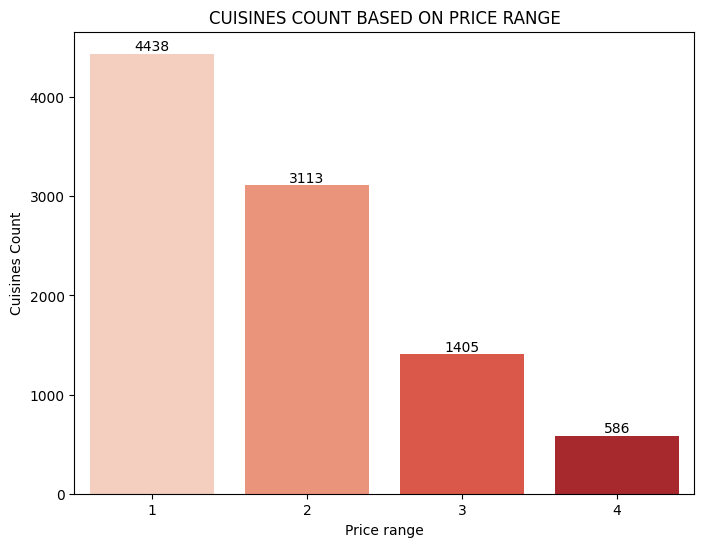

In [98]:
restaurant_counts = final_df.groupby('Price range')['Cuisines'].count().reset_index()
plt.figure(figsize = (8,6))
barplot = sns.barplot(x = "Price range", y = "Cuisines", data = restaurant_counts, palette = "Reds")
plt.title("CUISINES COUNT BASED ON PRICE RANGE")
plt.ylabel('Cuisines Count')

for index, value in enumerate(restaurant_counts['Cuisines']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', color='black')

plt.show()

In the price range labeled as 1, there are over 4000 cuisines available.